<a href="https://colab.research.google.com/github/alfdmsr/Car-Price-Prediction-Project/blob/main/Car_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction Project

### Langkah-langkah:
  1. Persiapan data
  2. EDA (Analisis Data Eksplorasi)
  3. Gunakan regresi linier untuk prediksi harga (MSRP - Manufacturer Suggested Retail Price)
  4. Memahami internal regresi linier
  5. Mengevaluasi model dengan RMSE (Root Mean Squared Error)
  6. Rekayasa Fitur (membuat fitur baru)
  7. Regulasi
  8. Menggunakan model


## 1. Persiapan Data - Proyek prediksi harga mobil

### Memuat Data dan mendapatkan gambaran umum

In [2]:
import pandas as pd
import numpy as np

# membaca file csv setelah mengunduh ...
df = pd.read_csv('data.csv')

# ... dan mendapatkan gambaran pertama tentang data
df.head(10)


# Yang dapat Anda lihat di sini, ada beberapa ketidakkonsistenan dalam cara penamaan kolom
# -> terkadang kolom memiliki garis bawah, terkadang tidak,
# terkadang kolom memiliki huruf kapital, terkadang tidak.
#
# df['Transmission Type'] berfungsi
# df.Transmission Type tidak berfungsi karena spasi

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


### Pembersihan

In [3]:
# Pandas DataFrame memiliki bidang yang disebut kolom,
# kolom adalah indeks, yaitu struktur data khusus yang berisi nama kolom di Pandas (sangat mirip dengan serial).
# seperti serial, ia juga memiliki metode str untuk melakukan manipulasi string. Apa yang dapat kita lakukan sekarang adalah menerapkan fungsi string yang sama ke semua nama kolom
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
# dtypes mengembalikan tipe kolom ini untuk semua kolom dan di sini kita tertarik pada "objek"
# Dalam kasus file csv, "objek" tidak boleh berupa sesuatu yang berbeda dari string
df.dtypes
df.dtypes == 'object'

# untuk memilih hanya objek
df.dtypes[df.dtypes == 'object']

,0
make,object
model,object
engine_fuel_type,object
transmission_type,object
driven_wheels,object
market_category,object
vehicle_size,object
vehicle_style,object


In [5]:
# Dapatkan akses ke indeks seri tersebut
# Mengonversinya ke daftar python dengan string nama
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [6]:
df['make'].str.lower().str.replace(' ', '_')

# langkah yang lebih baik
for col in strings:
  df[col] = df[col].str.lower().str.replace(' ', '_')

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2. Analisis Data Eksplorasi (EDA) - Proyek prediksi harga mobil   

### Mendapatkan gambaran umum

In [7]:
for col in df.columns:
  print(col)
  print(df[col].head())
  print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [8]:
for col in df.columns:
  print(col)
  # cetak hanya 5 nilai pertama
  # cetak(df[kolom].unik()[:5])
  print(df[col].unique())
  print("number of unique values: ", df[col].nunique())
  print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston_martin' 'land_rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']
number of unique values:  48

model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240' '2' '3_series_gran_turismo' '3_series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4_series_gran_coupe' '4_series' '400-class' '420-class' '456m'
 '458_italia' '4c' '4runner' '5_series_gran_turismo' '5_series'
 '500-class' '500e' '500' '500l' '500x' '550' '560-class' '570s' '575m'
 '57' '599' '5' '6_series_gran_coupe' '6_series' '600-class

### Distribusi harga


<Axes: xlabel='msrp', ylabel='Count'>

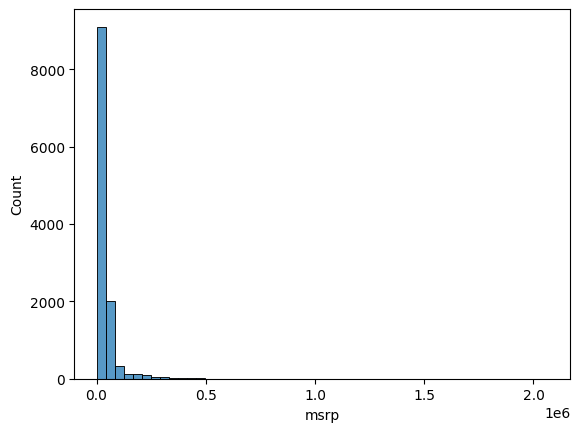

In [9]:
# Untuk membuat plot, kami menggunakan dua library : matplotlib dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# baris ini diperlukan untuk menampilkan plot di buku catatan
%matplotlib inline

# bins = jumlah batang dalam histogram
# pada diagram 1e6 berarti 10^^ = 1.000.000
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

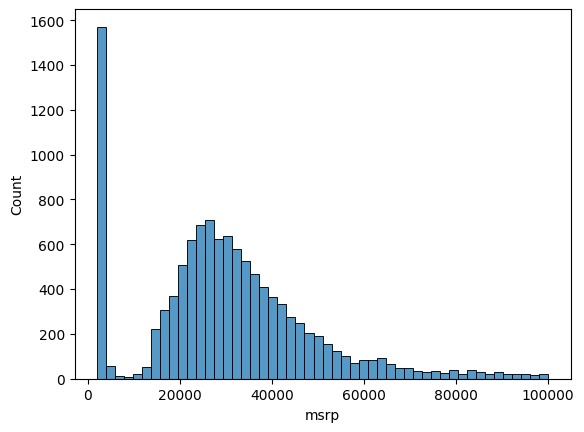

In [10]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

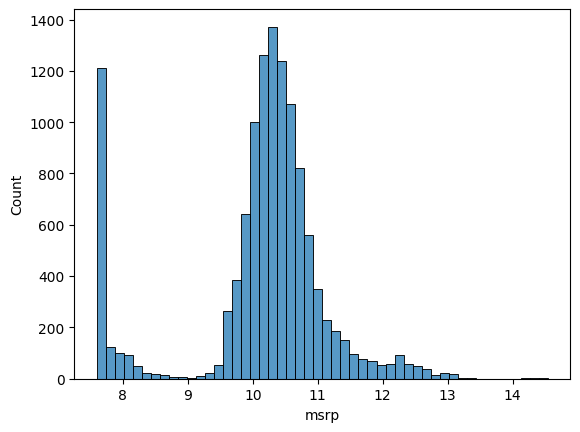

In [11]:
#np.log([0, 1,10,1000,100000])
# masalah dengan logaritma adalah ketika kita memiliki 0, karena log(0) tidak ada
#np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000 + 1])
# Keluaran: array([ 0. , 0.69314718, 2.39789527, 6.90875478, 11.51293546])
#
# agar tidak selalu menambahkan 1 ada fungsi NumPy
#np.log1p([0, 1,10,1000,100000])
# Keluaran: array([ 0. , 0.69314718, 2.39789527, 6.90875478, 11.51293546])
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50)

### Nilai yang hilang

In [12]:
df.isnull().sum()

,0
make,0
model,0
year,0
engine_fuel_type,3
engine_hp,69
engine_cylinders,30
transmission_type,0
driven_wheels,0
number_of_doors,6
market_category,3742


### Menyiapkan kerangka validasi

In [13]:
# Mengembalikan jumlah rekaman dari seluruh kumpulan data
len(df)
# Output: 11914

# Hitung 20% ​​dari seluruh dataset
int(len(df) * 0.2)
# Output: 2382


2382

In [14]:
n = len(df)
n_val = n_test = int(n * 0.2)
n_train = n - n_val - n_test
n, n_val + n_test + n_train
# Output: (11914, 11914)

# ukuran kerangka data kami
n_val, n_test, n_train
# Output: (2382, 2382, 7150)

df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [15]:
idx = np.arange(n)
idx
# Output: array([    0,     1,     2, ..., 11911, 11912, 11913])

# untuk membuatnya dapat direproduksi
#np.random.seed(2)
np.random.shuffle(idx)
idx
# Output: array([ 2075,  5197, 10681, ...,  9478,  6426,  9287])

array([ 6572,  7347,  6162, ...,  1533,  6141, 10909])

In [16]:
# Buat kumpulan data acak dengan ukuran yang benar
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [19]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## 3. Regresi linier

### Mundurlah dan fokus pada satu pengamatan


In [20]:
df_train.iloc[10]

,10
make,bmw
model,6_series_gran_coupe
year,2017
engine_fuel_type,premium_unleaded_(required)
engine_hp,445.0
engine_cylinders,8.0
transmission_type,automatic
driven_wheels,all_wheel_drive
number_of_doors,4.0
market_category,"luxury,high-performance"


### Implementasi fungsi regresi linier

In [21]:
def linear_regression(xi):
  n = len(xi)
  pred = w0

  for j in range(n):
    pred = pred + w[j] * xi[j]
  return pred

# nilai sampel untuk w0 dan w dan xi yang diberikan
xi = [310, 16, 210]
w0 = 0
w = [1, 1, 1]

linear_regression(xi)
# Output: 536

# coba beberapa nilai lainnya
w0 = 7.17
w = [0.01, 0.04, 0.002]
linear_regression(xi)
# Output: 11.33


11.33

In [22]:
# Dapatkan prediksi harga sebenarnya dalam $
# Kita melakukan "-1" di sini untuk membatalkan "+1" di dalam log
np.exp(11.33) - 1
# Output: 83282.02284496387

# Pintasan untuk tidak melakukan -1 secara manual
np.expm1(11.33)
# Output: 83282.02284496387

# Hanya untuk pengecekan saja
# np.log1p(83282.02284496387)
# Output: 11.33

83282.02284496387

### Bentuk vektor regresi linier

In [23]:
def dot(xi, w):
  n = len(xi)

  res = 0.0
  for j in range(n):
    res = res + xi[j] * w[j]

  return res

def linear_regression(xi):
  return w0 + dot(xi, w)

xi = [310, 16, 210]
w0 = 7.17
w = [0.01, 0.04, 0.002]

# menambahkan w0 ke vektor w
w_new = [w0] + w
w_new
# Output: [7.17, 0.01, 0.04, 0.002]

xi
# Output: [310, 16, 210]

def linear_regression(xi):
  xi = [1] + xi
  return dot(xi, w_new)

linear_regression(xi)
# Output: 11.33

11.33

In [24]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

x1 = [1, 310, 16, 210]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

# X becomes a list of lists
X = [x1, x2, x10]
X
# Output: [[1, 310, 16, 210], [1, 132, 25, 2031], [1, 453, 11, 86]]

# Ini mengubah daftar daftar menjadi matriks
X = np.array(X)
X
# array([[   1,  310,   16,  210],
#  [   1,  132,   25, 2031],
#  [   1,  453,   11,   86]])

# Sekarang kita punya prediksi, jadi untuk setiap mobil kita punya harga untuk mobil ini
y = X.dot(w_new)

# jalan pintas untuk tidak melakukan -1 secara manual untuk mendapatkan harga $ sebenarnya
np.expm1(y)
# Output: array([ 83282.02284496, 768348.51018973, 222347.22211011])


array([ 83282.02284496, 768348.51018973, 222347.22211011])

In [25]:
def linear_regression(X):
  return X.dot(w_new)

y = linear_regression(X)
np.expm1(y)
# Output: array([ 83282.02284496, 768348.51018973, 222347.22211011])

array([ 83282.02284496, 768348.51018973, 222347.22211011])

### Melatih model regresi llnier

In [26]:
def train_linear_regression(X, y):
  pass

X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X
# Output:
# array([[ 148,   24, 1385],
#             [ 132,   25, 2031],
#             [ 453,   11,   86],
#             [ 158,   24,  185],
#             [ 172,   25,  201],
#             [ 413,   11,   83],
#             [  38,   54,  185],
#             [ 142,   25,  431],
#             [ 453,   31,   86]])

ones = np.ones(9)
ones
# Output: array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

# X.shape[0] melihat jumlah baris dan membuat vektor satuan
ones = np.ones(X.shape[0])
ones
# Output: array([1., 1., 1.])

np.column_stack([ones, ones])
# Output:
# array([[1., 1.],
#             [1., 1.],
#             [1., 1.],
#             [1., 1.],
#             [1., 1.],
#             [1., 1.],
#             [1., 1.],
#             [1., 1.],
#             [1., 1.]])

X = np.column_stack([ones, X])
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

# MATRIKS GRAM
XTX = X.T.dot(X)

# MATRIKS GRAM Terbalik (inverse)
XTX_inv = np.linalg.inv(XTX)

# Tanpa round(1) itu bukan matriks identitas yang sebenarnya, tetapi nilai-nilai lainnya
# sangat dekat dengan 0 --> kita dapat memperlakukannya sebagai 0 dan menganggapnya sebagai matriks identitas
XTX.dot(XTX_inv)
# Output:
# array([[ 1.00000000e+00,  3.27949981e-18,  6.10659933e-17,
#          2.00482111e-19],
#        [-8.02345712e-13,  1.00000000e+00,  1.36992654e-14,
#          2.64644856e-19],
#        [-1.72442139e-13, -3.38516717e-18,  1.00000000e+00,
#          1.03459781e-17],
#        [-9.65831473e-13,  1.27770706e-15, -1.04366504e-14,
#          1.00000000e+00]])

# Ini memberi kita matriks I
XTX.dot(XTX_inv).round(1)
# Output:
# array([[ 1.,  0.,  0.,  0.],
#        [-0.,  1.,  0.,  0.],
#        [-0., -0.,  1.,  0.],
#        [-0.,  0., -0.,  1.]])

# w_full berisi semua bobot
w_full = XTX_inv.dot(X.T).dot(y)
w_full
# Output: array([ 3.00092529e+04, -2.27839691e+01, -2.57690874e+02, -2.30322797e+00])

w0 = w_full[0]
w = w_full[1:]
w0, w
# Output: (30009.252922766562, array([ -22.78396914, -257.69087426,   -2.30322797]))

def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

train_linear_regression(X, y)
# Output: (30009.252922766562, array([ -22.78396914, -257.69087426,   -2.30322797]))


(30009.252922766562, array([ -22.78396914, -257.69087426,   -2.30322797]))

## 4. Model dasar harga mobil

In [27]:
df_train.dtypes
# Output:
# make	object
# model	object
# year	int64
# engine_fuel_type	object
# engine_hp	float64
# engine_cylinders	float64
# transmission_type	object
# driven_wheels	object
# number_of_doors	float64
# market_category	object
# vehicle_size	object
# vehicle_style	object
# highway_mpg	int64
# city_mpg	int64
# popularity	int64

df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [28]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train[base].head()

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,240.0,6.0,28,20,617
1,175.0,4.0,32,25,640
2,190.0,6.0,19,14,549
3,182.0,4.0,25,20,1439
4,150.0,6.0,19,15,586


### Ekstraksi nilai

In [29]:
X_train = df_train[base].values
X_train


array([[2.400e+02, 6.000e+00, 2.800e+01, 2.000e+01, 6.170e+02],
       [1.750e+02, 4.000e+00, 3.200e+01, 2.500e+01, 6.400e+02],
       [1.900e+02, 6.000e+00, 1.900e+01, 1.400e+01, 5.490e+02],
       ...,
       [1.900e+02, 6.000e+00, 1.600e+01, 1.200e+01, 1.385e+03],
       [2.070e+02, 6.000e+00, 2.100e+01, 1.500e+01, 5.657e+03],
       [2.500e+02, 5.000e+00, 2.800e+01, 2.000e+01, 8.700e+02]])

### Nilai yang hilang

In [30]:
df_train[base].isnull().sum()

,0
engine_hp,41
engine_cylinders,14
highway_mpg,0
city_mpg,0
popularity,0


In [31]:
df_train[base].fillna(0).isnull().sum()

,0
engine_hp,0
engine_cylinders,0
highway_mpg,0
city_mpg,0
popularity,0


In [32]:
X_train = df_train[base].fillna(0).values
X_train
# Output:
# array([[5.030e+02, 8.000e+00, 2.500e+01, 1.800e+01, 6.170e+02],
#        [2.210e+02, 6.000e+00, 2.600e+01, 1.700e+01, 2.100e+02],
#        [1.690e+02, 4.000e+00, 2.700e+01, 2.000e+01, 5.657e+03],
#        ...,
#        [3.810e+02, 8.000e+00, 1.700e+01, 1.300e+01, 2.031e+03],
#        [3.000e+02, 6.000e+00, 2.400e+01, 1.800e+01, 3.916e+03],
#        [2.200e+02, 6.000e+00, 2.100e+01, 1.700e+01, 4.540e+02]])
y_train

array([10.85497167, 10.15214289,  7.77401508, ...,  9.89131375,
       10.00586362, 10.71110116])

In [33]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(7.881261326876765,
 array([ 9.62938901e-03, -1.45508996e-01,  1.48105314e-02,  1.54419165e-02,
        -2.17476105e-05]))

In [34]:
y_pred = w0 + X_train.dot(w)
y_pred

array([10.02937565,  9.83043487,  9.32343876, ...,  9.22994233,
        9.42111455, 10.26567639])

### Merencanakan kinerja model

<Axes: ylabel='Count'>

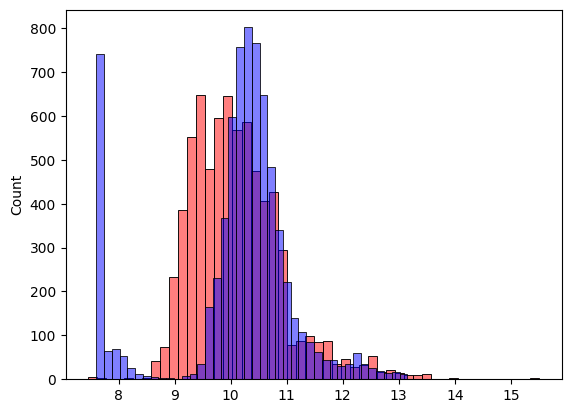

In [35]:
# alpha mengubah transparansi batang
# bins menentukan jumlah batang
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## 5. Kesalahan Akar Rata-rata Kuadrat - RMSE

In [36]:
def rmse(y, y_pred):
  se = (y - y_pred) ** 2
  mse = se.mean()
  return np.sqrt(mse)

rmse(y_train, y_pred)

0.7498961033708429

### Validasi model

In [37]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

def prepare_X(df):
  df_num = df[base]
  df_num = df_num.fillna(0)
  # extracting the Numpy array
  X = df_num.values
  return X

# training part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validation part:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# evaluation part:
rmse(y_val, y_pred)
# Output: 0.8023487592949454


0.7649078102299068

## 6. Rekayasa fitur sederhana

In [38]:
2001 - df_train.year

,year
0,-13
1,-16
2,2
3,-14
4,0
...,...
7145,-14
7146,-15
7147,-1
7148,-9


In [39]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

def prepare_X(df):
  df = df.copy()

  df['age'] = 2001 - df.year
  features = base + ['age']

  df_num = df[features]
  df_num = df_num.fillna(0)
# Mengekstrak array Numpy
  X = df_num.values
  return X
x_train = prepare_X(df_train)
X_train


array([[2.400e+02, 6.000e+00, 2.800e+01, 2.000e+01, 6.170e+02],
       [1.750e+02, 4.000e+00, 3.200e+01, 2.500e+01, 6.400e+02],
       [1.900e+02, 6.000e+00, 1.900e+01, 1.400e+01, 5.490e+02],
       ...,
       [1.900e+02, 6.000e+00, 1.600e+01, 1.200e+01, 1.385e+03],
       [2.070e+02, 6.000e+00, 2.100e+01, 1.500e+01, 5.657e+03],
       [2.500e+02, 5.000e+00, 2.800e+01, 2.000e+01, 8.700e+02]])

In [40]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.519296120043511

<Axes: ylabel='Count'>

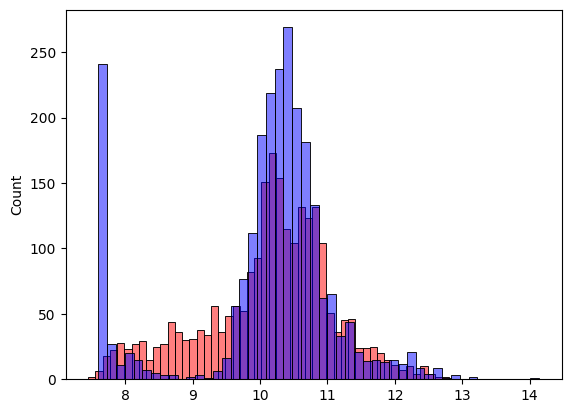

In [41]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

### Variabel kategoris

In [42]:
df_train.dtypes

,0
make,object
model,object
year,int64
engine_fuel_type,object
engine_hp,float64
engine_cylinders,float64
transmission_type,object
driven_wheels,object
number_of_doors,float64
market_category,object


In [43]:
df_train.number_of_doors.head()

,number_of_doors
0,4.0
1,4.0
2,4.0
3,4.0
4,2.0


In [44]:
df_train.number_of_doors == 2

,number_of_doors
0,False
1,False
2,False
3,False
4,True
...,...
7145,False
7146,False
7147,False
7148,True


In [45]:
df_train['number_of_doors_2'] = (df_train.number_of_doors == 2).astype('int')
df_train['number_of_doors_3'] = (df_train.number_of_doors == 3).astype('int')
df_train['number_of_doors_4'] = (df_train.number_of_doors == 4).astype('int')

In [46]:
'num_doors_%s' % 4
# Output: num_doors_4

# Dengan penggantian itu kita bisa menulis sebuah loop
for v in [2, 3, 4]:
  df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')

# kami menghapus ini karena kami akan menggunakan solusi lain
for v in [2, 3, 4]:
  del df_train['num_doors_%s' % v]

In [47]:
def prepare_X(df):
  df = df.copy()
  features = base.copy()

  df['age'] = 2001 - df.year
  features.append('age')

  for v in [2, 3, 4]:
    df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
    features.append('num_doors_%s' % v)

  df_num = df[features]
  df_num = df_num.fillna(0)
 # mengekstrak array Numpy
  X = df_num.values
  return X


prepare_X(df_train)


array([[240.,   6.,  28., ...,   0.,   0.,   1.],
       [175.,   4.,  32., ...,   0.,   0.,   1.],
       [190.,   6.,  19., ...,   0.,   0.,   1.],
       ...,
       [190.,   6.,  16., ...,   0.,   1.,   0.],
       [207.,   6.,  21., ...,   1.,   0.,   0.],
       [250.,   5.,  28., ...,   0.,   0.,   1.]])

In [48]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5157652083838069

In [49]:
df.make.nunique()

48

In [50]:
df.make.value_counts().head()
# Output:
# make
# chevrolet	1123
# ford	881
# volkswagen	809
# toyota	746
# dodge	626
# dtype: int6

# jika kita ingin mendapatkan nilai sebenarnya, kita menggunakan properti indeks
df.make.value_counts().head().index
# Bungkus dalam daftar Python biasa
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [51]:
def prepare_X(df):
  df = df.copy()
  features = base.copy()

  df['age'] = 2001 - df.year
  features.append('age')

  for v in [2, 3, 4]:
    df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
    features.append('num_doors_%s' % v)

  for v in makes:
    df['make_%s' % v] = (df.make == v).astype('int')
    features.append('make_%s' % v)

  df_num = df[features]
  df_num = df_num.fillna(0)
# mengekstrak array Numpy
  X = df_num.values
  return X

In [52]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.510630305991155

In [53]:
categorical_variables = ['make', 'model', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

# Kategori kamus akan berisi untuk setiap kategori
# 5 kategori paling umum
categories = {}

for c in categorical_variables:
  categories[c] = list(df[c].value_counts().head().index)

categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500',
  'tundra',
  'f-150',
  'sierra_1500',
  'beetle_convertible'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [54]:
def prepare_X(df):
  # cara ini bagus, jika tidak saat menggunakan df Anda akan mengubah data asli hal yang paling tidak diinginkan
  df = df.copy()
  features = base.copy()

  df['age'] = 2001 -df.year
  features.append('age')

  for v in [2, 3, 4]:
    df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
    features.append('num_doors_%s' % v)

# Perulangan pertama adalah untuk setiap kunci kategori kamus.
# Perulangan kedua adalah untuk setiap nilai di dalam kategori
# Untuk setiap nilai ini, kita membuat kolom baru.
  for c, values in categories.items():
    for v in values:
      df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
      features.append('%s_%s' % (c, v))

  df_num = df[features]
  df_num = df_num.fillna(0)
  # mengekstrak array Numpy
  X = df_num.values
  return X

In [55]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

663.2890901266984

## 7. Regulasi

In [56]:
# Anda melihat di sini kolom ke-2 dan ke-3 identik
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5]
]

X = np.array(X)
X
# Output:
# array([[4, 4, 4],
#        [3, 5, 5],
#        [5, 1, 1],
#        [5, 4, 4],
#        [7, 5, 5],
#        [4, 5, 5]])

XTX = X.T.dot(X)
XTX
# Output:
# array([[140, 111, 111],
#        [111, 108, 108],
#        [111, 108, 108]])

# np.linalg.inv(XTX)
# LinAlgError: Matriks singular

X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001],
]
X = np.array(X)
y = [1, 2, 3, 1, 2, 3]

XTX = X.T.dot(X)
XTX
# Output:
# array([[140.       , 111.       , 111.0000004],
#       [111.       , 108.       , 108.0000005],
#       [111.0000004, 108.0000005, 108.000001 ]])

XTX_inv = np.linalg.inv(XTX)
XTX_inv
# Output:
# array([[ 3.92646538e-02, -1.54615164e+05,  1.54615121e+05],
      #  [-1.54615170e+05,  3.51843724e+13, -3.51843721e+13],
      #  [ 1.54615129e+05, -3.51843721e+13,  3.51843718e+13]])

w = XTX_inv.dot(X.T).dot(y)
w
# Output: array([ 2.73776578e-01, -4.41093100e+06,  4.41093113e+06])

# Menambahkan angka kecil pada diagonal membantu mengendalikan. Jadi angka w menjadi lebih kecil
XTX = [
    [1.0001, 2, 2],
    [2, 1.0001, 1.0000001],
    [2, 1.0000001, 1.0001]
]
XTX = np.array(XTX)
np.linalg.inv(XTX)
# Output:

# membantu mengontrol. Jadi jumlah w menjadi lebih kecil
XTX = [
    [1.0001, 2, 2],
    [2, 1.0001, 1.0000001],
    [2, 1.0000001, 1.0001]
]
XTX = np.array(XTX)
np.linalg.inv(XTX)
# Output:
# array([[-3.33366691e-01,  3.33350007e-01,  3.33350007e-01],
#        [ 3.33350007e-01,  5.00492166e+03, -5.00508835e+03],
#        [ 3.33350007e-01, -5.00508835e+03,  5.00492166e+03]])

XTX = [
    [1.01, 2, 2],
    [2, 1.01, 1.0000001],
    [2, 1.0000001, 1.01]
]
XTX = np.array(XTX)
np.linalg.inv(XTX)
# Output:
# array([[ -0.33668908,   0.33501399,   0.33501399],
#        [  0.33501399,  49.91590897, -50.08509104],
#        [  0.33501399, -50.08509104,  49.91590897]])

XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]
XTX = np.array(XTX)
XTX
#  Output:
# array([[1.       , 2.       , 2.       ],
#        [2.       , 1.       , 1.0000001],
#        [2.       , 1.0000001, 1.       ]])

np.eye(3)
# Saat menambahkan XTX ke matriks ini, ia menambahkan satu pada diagonal
XTX + np.eye(3)

# Kita dapat mengalikan mata ini dengan angka kecil
XTX = XTX + 0.01*np.eye(3)
XTX
# Output:
# array([[1.01     , 2.       , 2.       ],
#        [2.       , 1.01     , 1.0000001],
#        [2.       , 1.0000001, 1.01     ]])

XTX = XTX + 0.1*np.eye(3)
XTX
# Output:
# array([[1.11     , 2.       , 2.       ],
#        [2.       , 1.11     , 1.0000001],
#        [2.       , 1.0000001, 1.11     ]])

XTX = XTX + 1*np.eye(3)
XTX
# Output:
# array([[2.11     , 2.       , 2.       ],
#        [2.       , 2.11     , 1.0000001],
#        [2.       , 1.0000001, 2.11     ]])

np.linalg.inv(XTX)

array([[-2.1628768 ,  1.39091751,  1.39091751],
       [ 1.39091751, -0.2832585 , -1.18415948],
       [ 1.39091751, -1.18415948, -0.2832585 ]])

In [57]:
# reg = diregulasi
# parameter r = kependekan dari regularisasi
def train_linear_regression_reg(X, y, r=0.001):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [58]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4841978773328647

### Menyetel model

In [59]:
for r in  [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
  X_train = prepare_X(df_train)
  w0, w = train_linear_regression_reg(X_train, y_train, r=r)

  X_val = prepare_X(df_val)
  y_pred = w0 + X_val.dot(w)

  score = rmse(y_val, y_pred)
  print("reg parameter: ",r, "bias term: ",w0, "rmse: ",score)

reg parameter:  0.0 bias term:  3207562920665845.0 rmse:  663.2890901266984
reg parameter:  1e-05 bias term:  5.637413896238382 rmse:  0.48420574683873596
reg parameter:  0.0001 bias term:  5.287275569736831 rmse:  0.4842056356671004
reg parameter:  0.001 bias term:  5.295585438030056 rmse:  0.4842047829342343
reg parameter:  0.01 bias term:  5.273336599675713 rmse:  0.4841978773328647
reg parameter:  0.1 bias term:  5.083809664439422 rmse:  0.48423900230838135
reg parameter:  1 bias term:  4.373462653255396 rmse:  0.486024432866935
reg parameter:  10 bias term:  3.551930571180068 rmse:  0.49627334080728547


In [60]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)

print("rmse: ",score)

rmse:  0.4842047829342343


### menggabungkan kumpulan data

In [61]:
df_full_train = pd.concat([df_train, df_val])

In [62]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([10.85497167, 10.15214289,  7.77401508, ...,  9.99838856,
       10.00789261,  9.92505333])

### Mengatur ulang indeks

In [63]:
df_full_train = df_full_train.reset_index(drop=True)

### mendapatkan matriks fitur X

In [64]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[240.,   6.,  28., ...,   0.,   0.,   0.],
       [175.,   4.,  32., ...,   0.,   0.,   0.],
       [190.,   6.,  19., ...,   0.,   0.,   0.],
       ...,
       [161.,   4.,  28., ...,   0.,   0.,   0.],
       [155.,   4.,  31., ...,   1.,   0.,   0.],
       [140.,   4.,  31., ...,   0.,   0.,   0.]])

### Melatih model akhir

In [65]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
w0, w

(5.30028768167662,
 array([ 2.53925021e-03,  1.07237395e-01, -7.80521332e-03, -3.23567788e-03,
        -4.34207615e-05, -9.80291462e-02, -9.69745348e-01, -1.17155264e+00,
        -8.29962114e-01, -1.16806674e-01,  7.26445700e-02,  5.89440243e-02,
        -1.08330527e-01, -2.04334463e-01, -2.81285139e-01, -6.69221559e-01,
        -3.30645335e-01, -4.35812591e-01, -3.88150269e-01,  7.98474096e-01,
         6.38659696e-01,  9.44250887e-01,  2.71314026e+00,  2.05642730e-01,
         1.31791049e+00,  1.30212957e+00,  1.39473416e+00,  1.28527116e+00,
        -1.14518128e-01,  4.50726435e-02, -5.88864235e-03,  1.95838497e-02,
         1.03812173e-02,  1.84840110e+00,  1.73305103e+00,  1.71877662e+00,
        -1.46363061e-02,  2.07091762e-02,  2.25913685e-01,  4.62414191e-01,
        -1.42735327e-01]))

### menerapkan model untuk menguji data

In [66]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
print("rmse: ",score)

rmse:  0.4708188719536986


## 8. Menggunakan model



###  Menggunakan model berarti:
  1. mengekstrak semua fitur (mendapatkan vektor fitur mobil)
  2. Menerapkan model akhir ke vektor fitur ini & mempredikasi harganya

### Ekstraksi fitur

In [92]:
df_test.iloc[12]

,12
make,chevrolet
model,impala
year,2016
engine_fuel_type,regular_unleaded
engine_hp,195.0
engine_cylinders,4.0
transmission_type,automatic
driven_wheels,front_wheel_drive
number_of_doors,4.0
market_category,NaN


In [93]:
car = df_test.iloc[12].to_dict()
car

{'make': 'chevrolet',
 'model': 'impala',
 'year': 2016,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 195.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'sedan',
 'highway_mpg': 31,
 'city_mpg': 22,
 'popularity': 1385}

In [94]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,impala,2016,regular_unleaded,195.0,4.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,31,22,1385


In [95]:
X_small = prepare_X(df_small)
X_small

array([[ 1.950e+02,  4.000e+00,  3.100e+01,  2.200e+01,  1.385e+03,
        -1.500e+01,  0.000e+00,  0.000e+00,  1.000e+00,  1.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         1.000e+00,  1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00]])

### Memprediksi Harga

In [96]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.195300087437285

In [99]:
np.expm1(y_pred)

26776.040121768383

In [100]:
np.expm1(y_test[12])

29460.000000000022